Link (https://www.kaggle.com/datasets/rabieelkharoua/predict-survival-of-patients-with-heart-failure).

Este conjunto de dados compila os registros médicos de 299 pacientes que apresentaram insuficiência cardíaca, coletados ao longo de seus períodos de acompanhamento, onde cada perfil de paciente possui 13 características clínicas distintas. Com uma natureza multivariada, o conjunto de dados é uma fonte valiosa para análises e modelagem preditiva no campo da saúde e medicina.

Uma descrição mais detalhada do conjunto de dados pode ser encontrada no artigo intitulado "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone", publicado na BMC Medical Informatics and Decision Making em 2020 por Davide Chicco e Giuseppe Jurman.DOI: https://doi.org/10.1186/s12911-020-1023-5.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score ,classification_report ,confusion_matrix

In [2]:
df=pd.read_csv(r'/kaggle/input/predict-survival-of-patients-with-heart-failure/heart_failure_clinical_records_dataset.csv')

O conjunto de dados inclui as seguintes variáveis:

1. **Idade (Age):** Representa a idade do paciente em anos. Os valores variam de 40 a 95 anos.

2. **Anemia (Anaemia):** Indica se o paciente apresenta redução de glóbulos vermelhos ou hemoglobina. É uma variável booleana, onde 0 representa a ausência de anemia e 1 representa a presença.

3. **Pressão alta (High blood pressure):** Indica se o paciente tem hipertensão. Também é uma variável booleana, com 0 representando a ausência de pressão alta e 1 representando sua presença.

4. **Creatinofosfoquinase (Creatinine phosphokinase):** Refere-se ao nível da enzima CPK no sangue, medido em mcg/L. Os valores variam de 23 a 7861 mcg/L.

5. **Diabetes (Diabetes):** Indica se o paciente tem diabetes. Assim como as variáveis anteriores, é uma variável booleana, com 0 indicando a ausência de diabetes e 1 indicando sua presença.

6. **Fração de ejeção (Ejection fraction):** Representa a porcentagem de sangue que deixa o coração em cada contração. É expressa como uma porcentagem, variando de 14% a 80%.

7. **Sexo (Sex):** Indica o sexo do paciente, com 0 representando mulher e 1 representando homem.

8. **Plaquetas (Platelets):** Refere-se à contagem de plaquetas no sangue, medida em kiloplaquetas/mL. Os valores variam de 25.01 a 850.00 kiloplaquetas/mL.

9. **Creatinina sérica (Serum creatinine):** Indica o nível de creatinina no sangue, medido em mg/dL. Os valores variam de 0.50 a 9.40 mg/dL.

10. **Sódio sérico (Serum sodium):** Representa o nível de sódio no sangue, medido em mEq/L. Os valores variam de 114 a 148 mEq/L.

11. **Tabagismo (Smoking):** Indica se o paciente é fumante (1) ou não (0).

12. **Tempo (Time):** Refere-se ao período de acompanhamento em dias, variando de 4 a 285 dias.

13. **Evento de morte (death event):** Esta é a variável alvo. Indica se o paciente faleceu durante o período de acompanhamento. É uma variável booleana, com 0 representando a sobrevivência do paciente durante o período e 1 representando a ocorrência de morte.

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Checando por NA's e análise explotaria dos dados

In [4]:
df.isna().any(axis=None)

False

In [5]:
df = df.dropna()

In [6]:
df.describe(include = "all")

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
X = df.drop(["DEATH_EVENT"],axis = 1)
y = df[["DEATH_EVENT"]]

Split de 75 - 25

In [8]:
trainX, testX, trainy, testy = train_test_split(X,y,test_size = 0.20,random_state=32,stratify=y)
print(trainX,testX,trainy,testy)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
116  60.0        1                        96         1                 60   
248  40.0        0                       624         0                 35   
210  70.0        0                       212         1                 17   
224  58.0        0                       582         1                 25   
15   82.0        1                       379         0                 50   
..    ...      ...                       ...       ...                ...   
236  75.0        0                       119         0                 50   
257  58.0        0                       132         1                 38   
95   58.0        1                       133         0                 60   
293  63.0        1                       103         1                 35   
219  55.0        0                       582         1                 35   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

 - **Salvando testes para Investigação da incerteza**

In [10]:
test_incertitumbre = testX
test_incertitumbre.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
256,65.0,0,326,0,38,0,294000.0,1.7,139,0,0,220
29,82.0,0,70,1,30,0,200000.0,1.2,132,1,1,26
214,65.0,1,135,0,35,1,290000.0,0.8,134,1,0,194
289,90.0,1,337,0,38,0,390000.0,0.9,144,0,0,256
274,60.0,1,257,1,30,0,150000.0,1.0,137,1,1,245


PCA Para plot das incertezas

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [12]:
X_test_pca = pca.fit_transform(testX)
X_test_pca = pca.transform(testX)
X_test_pca

array([[ 2.88189287e+04, -3.21418979e+02],
       [-6.51810745e+04, -5.75257122e+02],
       [ 2.48189275e+04, -5.12166292e+02],
       [ 1.24818929e+05, -3.11177917e+02],
       [-1.15181071e+05, -3.89991645e+02],
       [-6.21810723e+04, -5.81109927e+02],
       [ 1.58189274e+04, -4.48695928e+02],
       [-3.41810530e+04,  3.89370212e+03],
       [-1.43181071e+05, -6.33154076e+01],
       [-1.82303759e+03,  5.63969046e+02],
       [-8.41810735e+04, -5.30638538e+02],
       [ 8.81892837e+03, -4.02278691e+02],
       [-1.82303973e+03, -6.55135223e+01],
       [ 3.68189272e+04, -3.66188298e+02],
       [-3.71810737e+04, -5.85948271e+02],
       [-5.51810706e+04,  9.10752614e+01],
       [-8.01810726e+04, -5.53813195e+02],
       [ 2.67818927e+05, -5.67425798e+02],
       [ 6.18189302e+04, -2.98050435e+01],
       [ 3.78189289e+04, -1.68825446e+02],
       [-9.31810736e+04, -5.86831215e+02],
       [ 8.18927159e+02, -4.61321123e+02],
       [ 4.81892910e+03, -6.46039728e+01],
       [-1.

In [13]:
pca.explained_variance_ratio_

array([9.99928543e-01, 7.08836406e-05])

### Modelo M1

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()

trainX = scaler.fit_transform(trainX)
testX = scaler.transform(testX)

In [15]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 2,max_depth = 2)
model.fit(trainX,trainy)
M1 = model.predict_proba(testX)
M1

array([[0.52941176, 0.47058824],
       [0.5       , 0.5       ],
       [0.93103448, 0.06896552],
       [0.93103448, 0.06896552],
       [0.93103448, 0.06896552],
       [0.93103448, 0.06896552],
       [0.93103448, 0.06896552],
       [0.93103448, 0.06896552],
       [0.08      , 0.92      ],
       [0.52941176, 0.47058824],
       [0.93103448, 0.06896552],
       [0.93103448, 0.06896552],
       [0.52941176, 0.47058824],
       [0.93103448, 0.06896552],
       [0.93103448, 0.06896552],
       [0.52941176, 0.47058824],
       [0.93103448, 0.06896552],
       [0.93103448, 0.06896552],
       [0.93103448, 0.06896552],
       [0.93103448, 0.06896552],
       [0.93103448, 0.06896552],
       [0.93103448, 0.06896552],
       [0.93103448, 0.06896552],
       [0.08      , 0.92      ],
       [0.93103448, 0.06896552],
       [0.93103448, 0.06896552],
       [0.93103448, 0.06896552],
       [0.08      , 0.92      ],
       [0.52941176, 0.47058824],
       [0.08      , 0.92      ],
       [0.

O modelo de árvore de decisão apresenta uma acurácia geral de 72%, o que indica que ele classifica corretamente 72% dos casos. Especificamente, ele alcança uma precisão de 74% na previsão de sobrevivência (classe 0) e uma precisão de 60% na previsão de morte (classe 1). No entanto, é importante notar que o modelo tem um recall mais alto para a classe 0 (90%), o que significa que ele identifica a sobrevivência com mais eficácia do que a morte. Isso é confirmado pela pontuação F1, que combina precisão e recall, sendo 81% para a classe 0 e 41% para a classe 1. Portanto, enquanto o modelo é razoavelmente preciso na previsão de sobrevivência, sua capacidade de prever mortes é menos satisfatória, sugerindo que pode haver espaço para melhorias na detecção de casos fatais.

In [16]:
print(classification_report(testy,model.predict(testX)))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81        41
           1       0.60      0.32      0.41        19

    accuracy                           0.72        60
   macro avg       0.67      0.61      0.61        60
weighted avg       0.70      0.72      0.69        60



In [17]:
m1_incertezas = pd.DataFrame({"M1_C1":M1[:,0],"M1_C2":M1[:,1]})
m1_incertezas.head()

,M1_C1,M1_C2
0,0.529412,0.470588
1,0.500000,0.500000
2,0.931034,0.068966
3,0.931034,0.068966
4,0.931034,0.068966


In [18]:
m1_incertezas['incerteza_m1'] = 1-m1_incertezas.max(axis=1)
m1_incertezas.head()

,M1_C1,M1_C2,incerteza_m1
0,0.529412,0.470588,0.470588
1,0.500000,0.500000,0.500000
2,0.931034,0.068966,0.068966
3,0.931034,0.068966,0.068966
4,0.931034,0.068966,0.068966


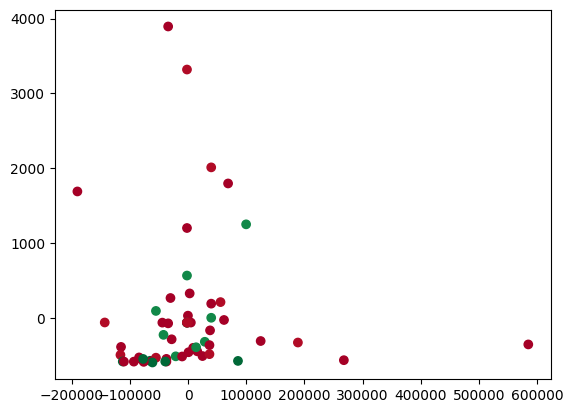

In [19]:
plt.scatter(X_test_pca[:,0], X_test_pca[:,1],c=(m1_incertezas['incerteza_m1']),cmap='RdYlGn')

Quanto mais avermelhada, menor a incerteza para a previsão, no geral, o gráfico de dispersão revela que o modelo estava muito certo sobre suas previsões ou muito incerto sobre elas. 

### Modelo M2

In [20]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', random_state=1,probability = True)
model.fit(trainX,np.array(trainy).reshape(-1))
M2 = model.predict_proba(testX)
M2


array([[0.90925606, 0.09074394],
       [0.19765466, 0.80234534],
       [0.88378761, 0.11621239],
       [0.88385084, 0.11614916],
       [0.83343601, 0.16656399],
       [0.96224765, 0.03775235],
       [0.46584457, 0.53415543],
       [0.43366937, 0.56633063],
       [0.64284969, 0.35715031],
       [0.45974034, 0.54025966],
       [0.56380045, 0.43619955],
       [0.94974258, 0.05025742],
       [0.68110412, 0.31889588],
       [0.6876851 , 0.3123149 ],
       [0.80947641, 0.19052359],
       [0.78432018, 0.21567982],
       [0.90812527, 0.09187473],
       [0.79603746, 0.20396254],
       [0.91640373, 0.08359627],
       [0.9037974 , 0.0962026 ],
       [0.72287187, 0.27712813],
       [0.89154002, 0.10845998],
       [0.80059541, 0.19940459],
       [0.39503319, 0.60496681],
       [0.70109334, 0.29890666],
       [0.71764369, 0.28235631],
       [0.91903098, 0.08096902],
       [0.09403915, 0.90596085],
       [0.85421382, 0.14578618],
       [0.30043084, 0.69956916],
       [0.

O modelo de Support Vector Machine (SVC) com kernel RBF (Radial Basis Function) apresenta uma acurácia geral de 75%, indicando que ele classifica corretamente 75% dos casos. Especificamente, o modelo atinge uma precisão de 76% na previsão de sobrevivência (classe 0) e uma precisão de 70% na previsão de morte (classe 1). No entanto, o recall é mais alto para a classe 0 (93%) em comparação com a classe 1 (37%), sugerindo que o modelo é mais eficaz na identificação de casos de sobrevivência do que de morte. Isso é refletido nas pontuações F1, que são de 84% para a classe 0 e 48% para a classe 1. Portanto, embora o modelo tenha um desempenho geral razoável, há espaço para melhorias na detecção de casos fatais.

In [21]:
print(classification_report(testy,model.predict(testX)))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84        41
           1       0.70      0.37      0.48        19

    accuracy                           0.75        60
   macro avg       0.73      0.65      0.66        60
weighted avg       0.74      0.75      0.72        60



In [22]:
m2_incertezas = pd.DataFrame({"M2_C1":M2[:,0],"M2_C2":M2[:,1]})
m2_incertezas.head()

,M2_C1,M2_C2
0,0.909256,0.090744
1,0.197655,0.802345
2,0.883788,0.116212
3,0.883851,0.116149
4,0.833436,0.166564


In [23]:
m2_incertezas['incerteza_m2'] = 1-m2_incertezas.max(axis=1)
m2_incertezas.head()

,M2_C1,M2_C2,incerteza_m2
0,0.909256,0.090744,0.090744
1,0.197655,0.802345,0.197655
2,0.883788,0.116212,0.116212
3,0.883851,0.116149,0.116149
4,0.833436,0.166564,0.166564


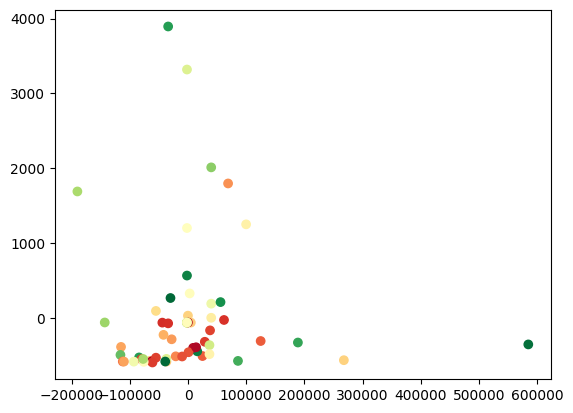

In [24]:
plt.scatter(X_test_pca[:,0], X_test_pca[:,1],c=(m2_incertezas['incerteza_m2']),cmap='RdYlGn')

Quanto mais avermelhada, menor a incerteza para a previsão, em instâncias mais distantes, aparentemente houve uma maior incerteza do modelo (as instâncias que estão nas extremidades, lembrando que o pca condensa 95% da variabilidade dos dados), as instâncias em amarelo tiveram uma incerteza menor do que as instâncias em verde. Ou seja, as instâncias mais diferentes e "únicas" tiveram uma maior incerteza associada.

### Modelo M3

In [25]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(trainX,trainy)
M3 = model.predict_proba(testX)
M3

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([[0.8, 0.2],
       [0.6, 0.4],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.8, 0.2],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.4, 0.6],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.6, 0.4],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8,

O modelo k-Nearest Neighbors (kNN) com 5 vizinhos apresenta uma Acurácia geral de 65%, indicando que ele classifica corretamente 65% dos casos. Especificamente, o modelo atinge uma precisão de 70% na previsão de sobrevivência (classe 0) e uma precisão de 40% na previsão de morte (classe 1). O recall é mais alto para a classe 0 (85%) em comparação com a classe 1 (21%), sugerindo que o modelo é mais eficaz na identificação de casos de sobrevivência do que de morte. Isso é refletido nas pontuações F1, que são de 77% para a classe 0 e 28% para a classe 1. No geral, o modelo kNN com 5 vizinhos demonstra um desempenho modesto na classificação dos casos, com um equilíbrio entre precisão e recall que pode ser melhorado.

In [26]:
print(classification_report(testy,model.predict(testX)))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77        41
           1       0.40      0.21      0.28        19

    accuracy                           0.65        60
   macro avg       0.55      0.53      0.52        60
weighted avg       0.60      0.65      0.61        60



In [27]:
m3_incertezas = pd.DataFrame({"M3_C1":M3[:,0],"M3_C2":M3[:,1]})
m3_incertezas.head()

,M3_C1,M3_C2
0,0.8,0.2
1,0.6,0.4
2,1.0,0.0
3,0.8,0.2
4,0.8,0.2


In [28]:
m3_incertezas['incerteza_m3'] = 1-m3_incertezas.max(axis=1)
m3_incertezas.head()

,M3_C1,M3_C2,incerteza_m3
0,0.8,0.2,0.2
1,0.6,0.4,0.4
2,1.0,0.0,0.0
3,0.8,0.2,0.2
4,0.8,0.2,0.2


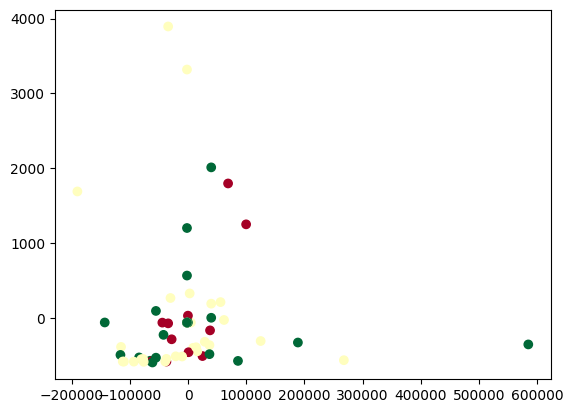

In [29]:
plt.scatter(X_test_pca[:,0], X_test_pca[:,1],c=(m3_incertezas['incerteza_m3']),cmap='RdYlGn')

Quanto mais avermelhada, menor a incerteza para a previsão, no geral, o modelo KNN teve uma performance pior no quesito incerteza do que os outros modelos, com muitas instâncias similares tendo cores verdes e amarelas, parecendo haver alguma falha na identificação de instâncias, visto que instâncias muitos similares com alto níveis de incerteza aparecem próximas a instâncias preditas com baixos níveis de incerteza.

### Calculo da Incerteza dos Modelos Classe 1

In [30]:
incer_models = pd.DataFrame({"M1":m1_incertezas['incerteza_m1'],"M2":m2_incertezas['incerteza_m2'],
                          "M3":m3_incertezas['incerteza_m3']})
incer_models.head()

,M1,M2,M3
0,0.470588,0.090744,0.2
1,0.500000,0.197655,0.4
2,0.068966,0.116212,0.0
3,0.068966,0.116149,0.2
4,0.068966,0.166564,0.2


In [31]:
incer_models['medias_probs'] = incer_models.mean(axis=1)
incer_models.head()

,M1,M2,M3,medias_probs
0,0.470588,0.090744,0.2,0.253777
1,0.500000,0.197655,0.4,0.365885
2,0.068966,0.116212,0.0,0.061726
3,0.068966,0.116149,0.2,0.128372
4,0.068966,0.166564,0.2,0.145177


### Epistemica

In [32]:
incer_models['var_probs'] = incer_models.var(axis=1)
incer_models.head()

,M1,M2,M3,medias_probs,var_probs
0,0.470588,0.090744,0.2,0.253777,0.025493
1,0.500000,0.197655,0.4,0.365885,0.015817
2,0.068966,0.116212,0.0,0.061726,0.002277
3,0.068966,0.116149,0.2,0.128372,0.002936
4,0.068966,0.166564,0.2,0.145177,0.003090


Usando o Desvio Padrão:

In [33]:
incer_models.std(axis=1)

0     0.171879
1     0.190716
2     0.049139
3     0.073137
4     0.079721
5     0.028952
6     0.172982
7     0.161270
8     0.168810
9     0.199700
10    0.188522
11    0.073540
12    0.171367
13    0.119074
14    0.077085
15    0.182310
16    0.072023
17    0.087613
18    0.071978
19    0.042427
20    0.107879
21    0.046470
22    0.086541
23    0.176938
24    0.114728
25    0.109497
26    0.037804
27    0.148660
28    0.166831
29    0.113847
30    0.201810
31    0.181792
32    0.062536
33    0.165043
34    0.082687
35    0.065205
36    0.180092
37    0.199228
38    0.154716
39    0.178287
40    0.184462
41    0.199049
42    0.037954
43    0.101944
44    0.183149
45    0.130616
46    0.178046
47    0.181871
48    0.151269
49    0.182886
50    0.151994
51    0.102146
52    0.205935
53    0.184158
54    0.130150
55    0.171399
56    0.079305
57    0.188969
58    0.152587
59    0.072555
dtype: float64

### Analise Exploratoria - Incerteza Associada

Epistemica

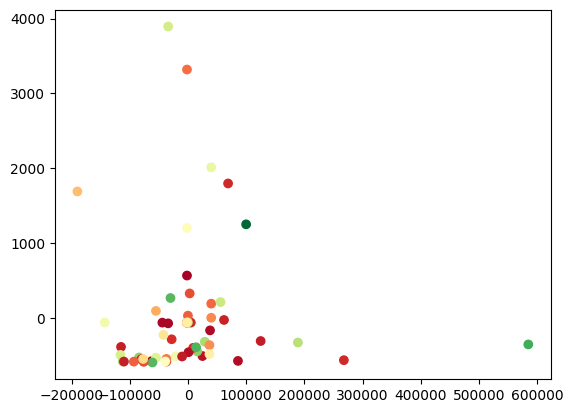

In [34]:
plt.scatter(X_test_pca[:,0], X_test_pca[:,1],c=(incer_models['var_probs']),cmap='RdYlGn')

Considerando o Pool de Modelos (M1, M2 e M3), muitas instâncias estão em vermelho, com pouca prevalencia de instâncias em verde claro e verde. Mostrando a consistência dos modelos em capturar a incerteza das instâncias em vermelho. As instâncias em verde e amarelo foram as que mais foram afetadas pela incerteza intrínseca da escolha do modelo, as instâncias em verde escuro mostram que existem uma alta variância nas incertezas associadas aos modelos, sendo as mais afetadas pela escolha do modelo correto.

Aleatoria

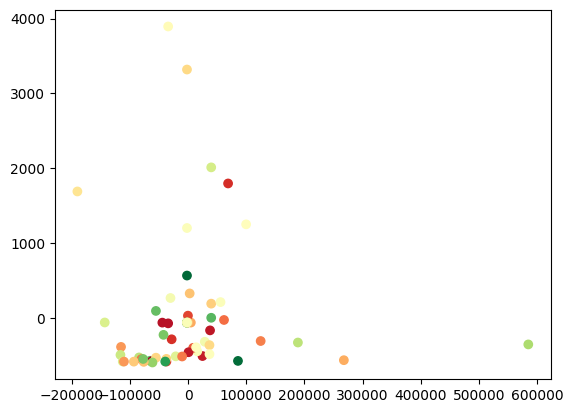

In [35]:
plt.scatter(X_test_pca[:,0], X_test_pca[:,1],c=(incer_models['medias_probs']),cmap='RdYlGn')

Considerando o Pool de Modelos (M1, M2 e M3), o modelo Knn parece ter aumentado as estimativas de incerteza, visto que a incerteza das instâncias no modelo **M3** foi muito grande, boa parte das instâncias aparentam ter uma moderada incerteza aleatória associada, com muitas instâncias em amarelo e vermelho claro, poucas instâncias aparecem totalmente em verde (representando uma alta incerteza aleatória). É interessante notar que, como o experimento não é controlado, muitos fatores externos podem ter contribuido para o aumento da incerteza aleatória em diversas instâncias

### Análise Exploratoria - Características dos pacientes e Incerteza Associada

In [36]:
test_incertitumbre['incerteza_aleatoria'] = np.array(incer_models['medias_probs'])

test_incertitumbre['incerteza_epistemica'] = np.array(incer_models[['var_probs']])
test_incertitumbre.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,incerteza_aleatoria,incerteza_epistemica
256,65.0,0,326,0,38,0,294000.0,1.7,139,0,0,220,0.253777,0.025493
29,82.0,0,70,1,30,0,200000.0,1.2,132,1,1,26,0.365885,0.015817
214,65.0,1,135,0,35,1,290000.0,0.8,134,1,0,194,0.061726,0.002277
289,90.0,1,337,0,38,0,390000.0,0.9,144,0,0,256,0.128372,0.002936
274,60.0,1,257,1,30,0,150000.0,1.0,137,1,1,245,0.145177,0.003090


In [37]:
test_incertitumbre['incerteza_aleatoria'].quantile([0.25, 0.5, 0.75])

0.25    0.140392
0.50    0.219732
0.75    0.294189
Name: incerteza_aleatoria, dtype: float64

In [38]:
test_incertitumbre.loc[test_incertitumbre['incerteza_aleatoria'] > 0.294, 'quantil_incert'] = '>0.294'
test_incertitumbre.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,incerteza_aleatoria,incerteza_epistemica,quantil_incert
256,65.0,0,326,0,38,0,294000.0,1.7,139,0,0,220,0.253777,0.025493,NaN
29,82.0,0,70,1,30,0,200000.0,1.2,132,1,1,26,0.365885,0.015817,>0.294
214,65.0,1,135,0,35,1,290000.0,0.8,134,1,0,194,0.061726,0.002277,NaN
289,90.0,1,337,0,38,0,390000.0,0.9,144,0,0,256,0.128372,0.002936,NaN
274,60.0,1,257,1,30,0,150000.0,1.0,137,1,1,245,0.145177,0.003090,NaN


In [39]:
test_incertitumbre.loc[test_incertitumbre['incerteza_aleatoria'] <= 0.1404, 'quantil_incert'] = '<=0.1404'
test_incertitumbre.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,incerteza_aleatoria,incerteza_epistemica,quantil_incert
256,65.0,0,326,0,38,0,294000.0,1.7,139,0,0,220,0.253777,0.025493,NaN
29,82.0,0,70,1,30,0,200000.0,1.2,132,1,1,26,0.365885,0.015817,>0.294
214,65.0,1,135,0,35,1,290000.0,0.8,134,1,0,194,0.061726,0.002277,<=0.1404
289,90.0,1,337,0,38,0,390000.0,0.9,144,0,0,256,0.128372,0.002936,<=0.1404
274,60.0,1,257,1,30,0,150000.0,1.0,137,1,1,245,0.145177,0.003090,NaN


In [40]:
test_incertitumbre.loc[(test_incertitumbre['incerteza_aleatoria'] > 0.1404) & (test_incertitumbre['incerteza_aleatoria'] <= 0.2197), 'quantil_incert'] = '>0.1404 & <=0.2197'
test_incertitumbre.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,incerteza_aleatoria,incerteza_epistemica,quantil_incert
256,65.0,0,326,0,38,0,294000.0,1.7,139,0,0,220,0.253777,0.025493,NaN
29,82.0,0,70,1,30,0,200000.0,1.2,132,1,1,26,0.365885,0.015817,>0.294
214,65.0,1,135,0,35,1,290000.0,0.8,134,1,0,194,0.061726,0.002277,<=0.1404
289,90.0,1,337,0,38,0,390000.0,0.9,144,0,0,256,0.128372,0.002936,<=0.1404
274,60.0,1,257,1,30,0,150000.0,1.0,137,1,1,245,0.145177,0.003090,>0.1404 & <=0.2197


In [41]:
test_incertitumbre.loc[(test_incertitumbre['incerteza_aleatoria'] > 0.2197) & (test_incertitumbre['incerteza_aleatoria'] <= 0.294), 'quantil_incert'] = '>0.2197 & <=0.2940'
test_incertitumbre.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,incerteza_aleatoria,incerteza_epistemica,quantil_incert
256,65.0,0,326,0,38,0,294000.0,1.7,139,0,0,220,0.253777,0.025493,>0.2197 & <=0.2940
29,82.0,0,70,1,30,0,200000.0,1.2,132,1,1,26,0.365885,0.015817,>0.294
214,65.0,1,135,0,35,1,290000.0,0.8,134,1,0,194,0.061726,0.002277,<=0.1404
289,90.0,1,337,0,38,0,390000.0,0.9,144,0,0,256,0.128372,0.002936,<=0.1404
274,60.0,1,257,1,30,0,150000.0,1.0,137,1,1,245,0.145177,0.003090,>0.1404 & <=0.2197


Há uma leve correlação positiva entre a concentração de serum_creatinine e a incerteza aleatória, no entanto não parece ser muito relevante dado o valor de 20%

In [43]:
from scipy import stats

# Assuming X and Y are your variables as numpy arrays
correlation, _ = stats.pearsonr(test_incertitumbre['serum_creatinine'],test_incertitumbre['incerteza_aleatoria'])

print("Correlation between X and Y:", correlation)

Correlation between X and Y: 0.20905811196565352


Há uma leve correlação negativa entre a concentração de serum_sodium e a incerteza aleatória, no entanto não parece ser muito relevante dado o valor de -22%

In [44]:
# Assuming X and Y are your variables as numpy arrays
correlation, _ = stats.pearsonr(test_incertitumbre['serum_sodium'],test_incertitumbre['incerteza_aleatoria'])

print("Correlation between X and Y:", correlation)

Correlation between X and Y: -0.2189402634848498


A idade média cresce de acordo com a incerteza, ou seja, pacientes com uma idade maior tem uma maior incerteza aleatória associada, talvez porque outros motivos associados ao envelhecimento podem estar afetando a taxa de sobrevivência dos pacientes.

In [45]:
age_stats_by_group = test_incertitumbre.groupby('quantil_incert')['age'].agg(['mean', 'median'])

print(age_stats_by_group)

                         mean  median
quantil_incert                       
<=0.1404            56.933333    55.0
>0.1404 & <=0.2197  61.866667    60.0
>0.2197 & <=0.2940  63.133333    60.0
>0.294              66.133333    65.0


A correlação entre idade e incerteza é moderada, sendo de 30%, portanto não é razoável discernir que a idade é o fator preponderante para que haja a incerteza, apesar da leve correlação entre idade e incerteza

In [46]:
from scipy.stats import pearsonr

# Assuming X and Y are your variables as numpy arrays
correlation, _ = pearsonr(test_incertitumbre['age'],test_incertitumbre['incerteza_aleatoria'])

print("Correlation between X and Y:", correlation)

Correlation between X and Y: 0.3025940986301494


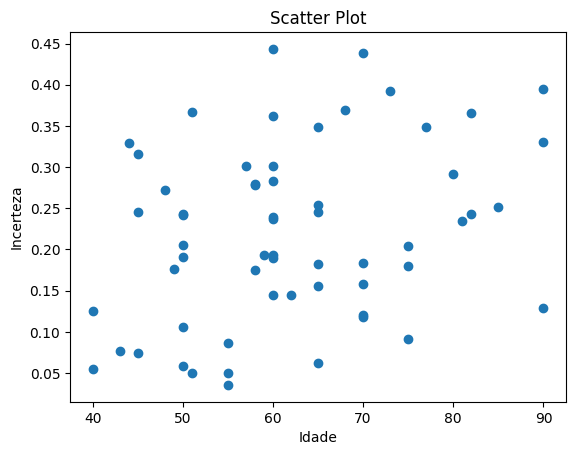

In [47]:
import matplotlib.pyplot as plt

# Assuming X and Y are your variables
plt.scatter(test_incertitumbre['age'],test_incertitumbre['incerteza_aleatoria'])

# Add labels and title
plt.xlabel('Idade')
plt.ylabel('Incerteza')
plt.title('Scatter Plot')

# Show the plot
plt.show()


#### Análise das categorias

Comparando a categoria de diabetes, as maiores incertezas aleatórias estão associadas aos pacientes que apresentam diabetes, sendo que neste grupo apenas 8% estavam associados com uma baixa incerteza. É possível que a ausência de diabetes esteja associada com uma previsão mais certeira de sobrevivência após a falha cardiaca, enquanto a presença de diabetes prejudique a previsão, aumentando sua incerteza.

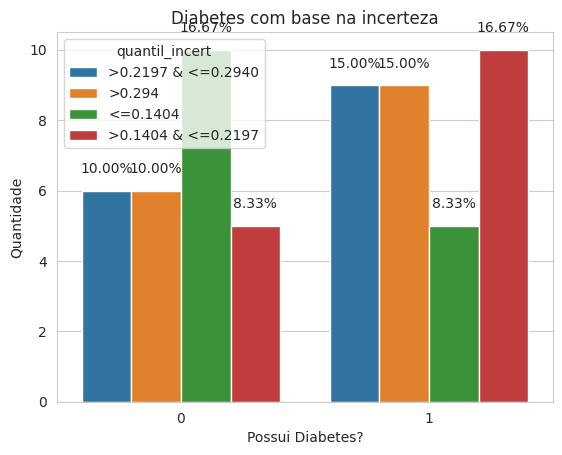

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set_style("whitegrid")

# Plot the bar plot with Seaborn
ax = sns.countplot(x="diabetes", hue="quantil_incert", data=test_incertitumbre)

# Add legend based on the 'quantil_incert' column
ax.legend(title='quantil_incert')

# Add labels and title
plt.xlabel('Possui Diabetes?')
plt.ylabel('Quantidade')
plt.title('Diabetes com base na incerteza')

# Add proportions on top of the bars
total = len(test_incertitumbre)  # Total number of observations
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.5,  # Offset for the text position
            f'{height / total:.2%}',  # Calculate and format the proportion
            ha="center")

# Show the plot
plt.show()


As maiores incertezas aleatorias estão associadas aos indivíduos do sexo masculino enquanto em indivíduos do sexo feminino a maior categoria de incerteza aleatória é a menor entre mulheres e também correspondendo a 1% do total. Ou seja para homens a incerteza foi muito maior, é interessante investigar os hábitos de fumo por sexo, e idade por sexo para verificar se podem ter alguma relação entre essas variáveis e a incerteza aleatória

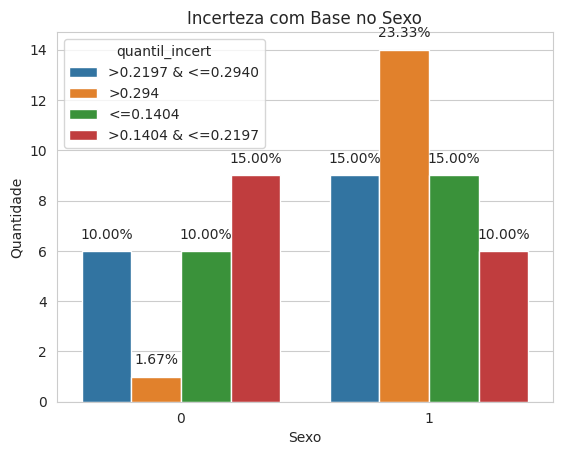

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set_style("whitegrid")

# Plot the bar plot with Seaborn
ax = sns.countplot(x="sex", hue="quantil_incert", data=test_incertitumbre)

# Add legend based on the 'quantil_incert' column
ax.legend(title='quantil_incert')

# Add labels and title
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.title('Incerteza com Base no Sexo')

# Add proportions on top of the bars
total = len(test_incertitumbre)  # Total number of observations
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.5,  # Offset for the text position
            f'{height / total:.2%}',  # Calculate and format the proportion
            ha="center")

# Show the plot
plt.show()


Visualmente o gráfico de dispersão mostra que muitos dos indivíduos do sexo masculino estão localizados nos limiares superiosres a 20% de incerteza, além disso muitos dos homens sem 60 anos ou mais de idade, sabemo que a idade tem uma moderada correlação com a incerteza aleatória

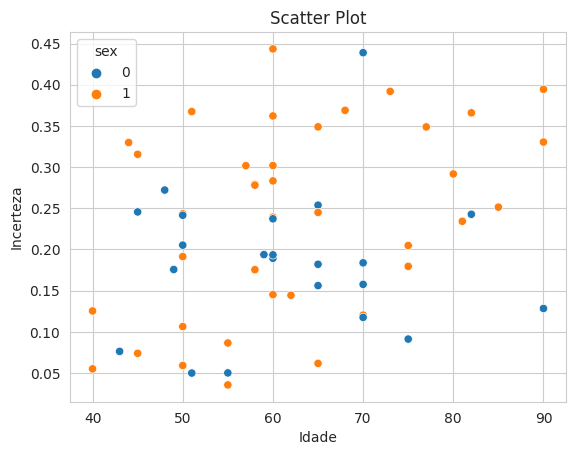

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming test_incertitumbre is your DataFrame with variables 'age', 'incerteza_aleatoria', and 'category'
sns.scatterplot(data=test_incertitumbre, x='age', y='incerteza_aleatoria', hue='sex')

# Add labels and title
plt.xlabel('Idade')
plt.ylabel('Incerteza')
plt.title('Scatter Plot')

# Show the plot
plt.show()


Nenhuma das mulheres tinha o hábito de fumar, enquanto considerando os homens, pelo menos 50% possuíam o hábito do fumo, cabe investigar os efeitos do hábito do fumo na incerteza.

In [51]:
# Assuming 'sex' and 'diabetes' are the columns containing the categorical variables
count_by_sex_diabetes = test_incertitumbre.groupby(['sex', 'smoking']).size().reset_index(name='count')

print(count_by_sex_diabetes)

   sex  smoking  count
0    0        0     22
1    1        0     19
2    1        1     19


É possível que exista um viés na base de dados, visto que de 105 mulheres, apenas aproximadamente 4% possuíam o hábito de fumar

In [53]:
df.groupby(['sex', 'smoking']).size().reset_index(name='count')

,sex,smoking,count
0,0,0,101
1,0,1,4
2,1,0,102
3,1,1,92


No geral, há uma menor incerteza aleatória nos pacientes que não possuíam o hábito de fumo, nesses casos a previsão é mais acertada, possuindo um menor grau de incerteza, enquanto casos de previsões com baixas incertezas em pacientes com hábito de fumo são muito mais difíceis, com um maior grau de incerteza associada às previsões de sobrevivência para pacientes fumantes

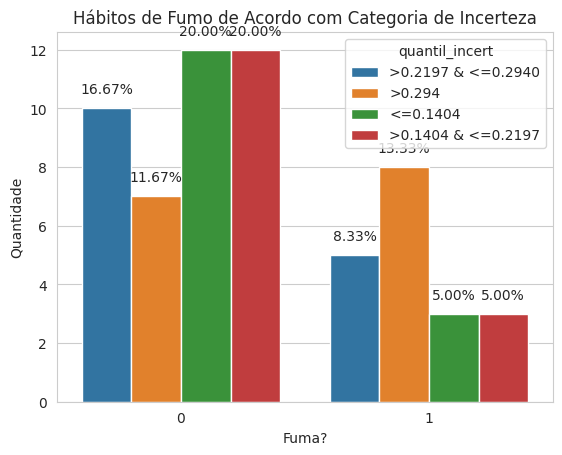

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set_style("whitegrid")

# Plot the bar plot with Seaborn
ax = sns.countplot(x="smoking", hue="quantil_incert", data=test_incertitumbre)

# Add legend based on the 'quantil_incert' column
ax.legend(title='quantil_incert')

# Add labels and title
plt.xlabel('Fuma?')
plt.ylabel('Quantidade')
plt.title('Hábitos de Fumo de Acordo com Categoria de Incerteza')

# Add proportions on top of the bars
total = len(test_incertitumbre)  # Total number of observations
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.5,  # Offset for the text position
            f'{height / total:.2%}',  # Calculate and format the proportion
            ha="center")

# Show the plot
plt.show()


Casos de pacientes não anêmicos estiveram associados a uma menor incerteza aleatória, enquanto pacientes que possuem anemia possuem um maior grau de incerteza em suas previsões, talvez por que fatores confundidores decorrentes da presença da anemia afetem mais a previsão do modelo, como menor presença de ferro, ou outros fatores que não foram mensurados nos dados

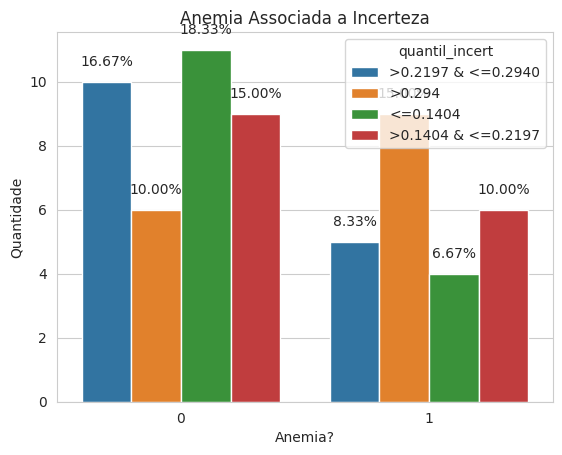

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set_style("whitegrid")

# Plot the bar plot with Seaborn
ax = sns.countplot(x="anaemia", hue="quantil_incert", data=test_incertitumbre)

# Add legend based on the 'quantil_incert' column
ax.legend(title='quantil_incert')

# Add labels and title
plt.xlabel('Anemia?')
plt.ylabel('Quantidade')
plt.title('Anemia Associada a Incerteza')

# Add proportions on top of the bars
total = len(test_incertitumbre)  # Total number of observations
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.5,  # Offset for the text position
            f'{height / total:.2%}',  # Calculate and format the proportion
            ha="center")

# Show the plot
plt.show()


A anemia não parece ser um fator muito preponderante para o sexo masculino, no entanto uma quantidade considerável de mulheres possuiu a condição de anemia, sendo que esta condição pode ter contribuído para a incerteza aleatória da previsão dessas pacientes, visto que nenhuma apresentava o hábito de fumo

In [57]:
test_incertitumbre.groupby(['sex', 'anaemia']).size().reset_index(name='count')

,sex,anaemia,count
0,0,0,13
1,0,1,9
2,1,0,23
3,1,1,15


#### Fumo e incerteza em Homens

Aparentemente o fumo e a idade são fatores que contribuem para o grau de incerteza aleatoria na previsão, talvez por que esses fatores possam gerar condições que não foram mensuradas ou não são possíveis de serem mensuradas, ex: o fumo em homens ocorre devido ao stress? Lembrando que o stress pode aumentar o grau de incerteza da previsão de sobrevivência, principalmente levando em conta que são pacientes cardíacos

O gráfico abaixo mostra que o menor grau de incerteza está associado aos homens que não possuem o hábito do fumo, apesar de também haverem bastantes casos com alto grau de incerteza aleatoria em homens não fumantes, no entanto, existem poucos casos de homens fumantes com baixo grau de incerteza na previsão de sobrevivência.

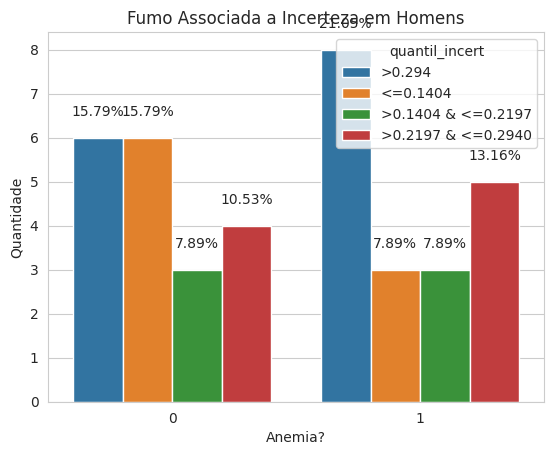

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set_style("whitegrid")

# Plot the bar plot with Seaborn
ax = sns.countplot(x="smoking", hue="quantil_incert", data=test_incertitumbre[test_incertitumbre['sex']==1])

# Add legend based on the 'quantil_incert' column
ax.legend(title='quantil_incert')

# Add labels and title
plt.xlabel('Anemia?')
plt.ylabel('Quantidade')
plt.title('Fumo Associada a Incerteza em Homens')

# Add proportions on top of the bars
total = len(test_incertitumbre[test_incertitumbre['sex']==1])  # Total number of observations
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.5,  # Offset for the text position
            f'{height / total:.2%}',  # Calculate and format the proportion
            ha="center")

# Show the plot
plt.show()


### Mulheres e Anemia

Neste caso todos os graus de incerteza aleatoria alta em mulheres estavam associados a condição de anemia, enquanto mulheres sem a condição anêmica apresentaram baixo grau de incerteza em suas previsões, sendo que do total de mulheres 27% não apresentaram anemia e possuem um baixo grau de incerteza associada a previsão.

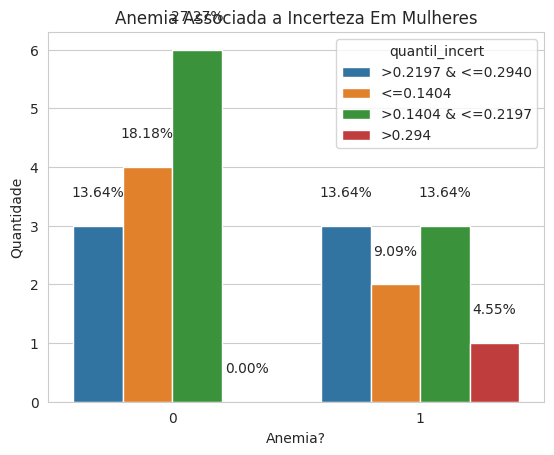

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set_style("whitegrid")

# Plot the bar plot with Seaborn
ax = sns.countplot(x="anaemia", hue="quantil_incert", data=test_incertitumbre[test_incertitumbre['sex']==0])

# Add legend based on the 'quantil_incert' column
ax.legend(title='quantil_incert')

# Add labels and title
plt.xlabel('Anemia?')
plt.ylabel('Quantidade')
plt.title('Anemia Associada a Incerteza Em Mulheres')

# Add proportions on top of the bars
total = len(test_incertitumbre[test_incertitumbre['sex']==0])  # Total number of observations
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.5,  # Offset for the text position
            f'{height / total:.2%}',  # Calculate and format the proportion
            ha="center")

# Show the plot
plt.show()


### Conclusão

Parece haver alguma relação entre os hábitos de fumo e a incerteza aleatoria na previsão da sobrevivência de homens (os quais >20% estão com alta incerteza associada, tanto ao considerar o fumo quando comparando com o sexo oposto),sugerindo uma possível interação entre o fumo e a incerteza na previsão da sobrevivência. Enquanto para as mulheres foi observado um aumento do percentual de incerteza quando considerando o fator anemia, em que, percentualmente, mulheres anêmicas tiveram uma maior incerteza aleatoria na previsão (~5%). 

Em homens e mulheres, a relação entre o hábito de fumar e a presença de anemia podem variar. Essa diferenciação sugere a importância de considerar a interação entre diferentes fatores para uma compreensão mais completa dos padrões de incerteza observados nos dados, as características associadas com o aumento de incerteza podem estar associadas a fatores não controláveis que contribuem para o aumento de incerteza.